# Multiclass Image Classifictaion

1. Data exploration
2. Data preprocessing
3. Create a model (the baseline)
4. Fit the model (overfit ot make sure it works)
5. Evaluate
6. Adjust diffrent hyperparameters and improve the model (beat the baseline)
7. repeat till satisfied

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import pathlib
import os

## 1. Data exploration

In [5]:
%ls 10_food_classes_all_data

 Volume in Laufwerk C: hat keine Bezeichnung.
 Volumeseriennummer: 3CAA-4105

 Verzeichnis von C:\Users\neema\Notebooks\Udemy_TensorFlow\10_food_classes_all_data

27.12.2021  18:40    <DIR>          .
27.12.2021  18:40    <DIR>          ..
27.12.2021  18:40    <DIR>          test
27.12.2021  18:42    <DIR>          train
               0 Datei(en),              0 Bytes
               4 Verzeichnis(se), 434.938.437.632 Bytes frei


In [6]:
# list the number of files in a directory

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [9]:
train_dir= "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [10]:
# Let'S get the class names

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [62]:
def view_random_image(target_dir, target_class):
    
    #setup target dir
    
    class_list = os.listdir(target_dir)
    random_class = np.random.randint(0, len(class_list))
    
    target_folder = os.path.join(target_dir, target_class[random_class])
    #target_folder = target_dir+target_class 
    image_list = os.listdir(target_folder)
    random_index = np.random.randint(0, len(image_list))
    
    rand_image = os.path.join(target_folder,image_list[random_index])
    
    img = mpimg.imread(rand_image)
    plt.imshow(img)
    plt.title(target_class[random_class])
    plt.axis('off');
    
    print(f"Filename: {image_list[random_index]}")
    print(f"Image shape: {img.shape}")
    
    return img

Filename: 302102.jpg
Image shape: (512, 382, 3)


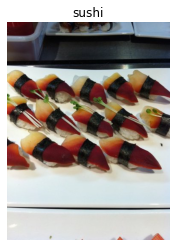

In [63]:
img = view_random_image(data_dir, class_names)

# 2. Preprocess the data

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:
#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                               batch_size=32,
                               target_size=(224,224),
                               class_mode='categorical',
                               seed=42)

test_data = train_datagen.flow_from_directory(directory=test_dir, # should be test_datagen but doesn' matter since they are equal
                               batch_size=32,
                               target_size=(224,224),
                               class_mode='categorical',
                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model

for the baseline the CNN-explainer model is recreated

In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [75]:
model_01 = Sequential([
    Conv2D(10, 3 , input_shape=(224,224,3), activation='relu'),
    Conv2D(10, 3 , activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3 , activation='relu'),
    Conv2D(10, 3 , activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_01.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

In [76]:
model_01.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 28090)            

## 4. Fit the model

In [77]:
history_01 = model_01.fit(train_data,
                         epochs=5,
                         steps_per_epoch = len(train_data),
                         validation_data = test_data,
                         validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 173s 736ms/step - loss: 2.2111 - accuracy: 0.1705 - val_loss: 2.0937 - val_accuracy: 0.2296
Epoch 2/5
235/235 [==============================] - 163s 693ms/step - loss: 1.9955 - accuracy: 0.3037 - val_loss: 1.8882 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 160s 683ms/step - loss: 1.7057 - accuracy: 0.4188 - val_loss: 1.9117 - val_accuracy: 0.3420
Epoch 4/5
235/235 [==============================] - 164s 699ms/step - loss: 1.1517 - accuracy: 0.6148 - val_loss: 2.2188 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 164s 697ms/step - loss: 0.5122 - accuracy: 0.8396 - val_loss: 3.1014 - val_accuracy: 0.2548


## 5. Evaluate the model

Text(0.5, 0, 'epochs')

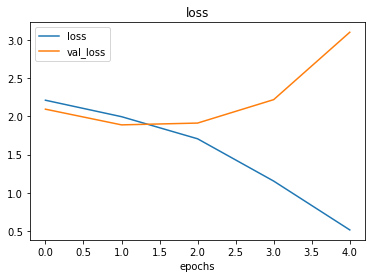

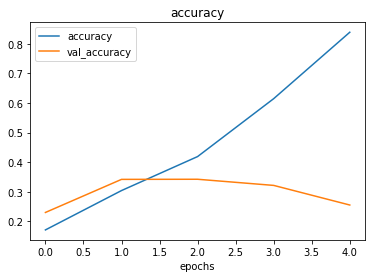

In [85]:
pd.DataFrame(history_01.history)[['loss','val_loss']].plot()
plt.title('loss')
plt.xlabel('epochs')

pd.DataFrame(history_01.history)[['accuracy','val_accuracy']].plot()
plt.title('accuracy')
plt.xlabel('epochs')

In [82]:
model_01.evaluate(test_data)

79/79 [==============================] - 14s 182ms/step - loss: 3.1014 - accuracy: 0.2548


[3.1014366149902344, 0.2547999918460846]

from the evalution (loss and accuracy curves) we can conclude that the model is overfitting (does great on training data and poorly on test data)

In [86]:
model_02 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_02.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

In [87]:
history_02 = model_02.fit(train_data,
                         epochs=5,
                         steps_per_epoch = len(train_data),
                         validation_data = test_data,
                         validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 63s 266ms/step - loss: 2.2111 - accuracy: 0.2408 - val_loss: 2.0058 - val_accuracy: 0.2892
Epoch 2/5
235/235 [==============================] - 66s 283ms/step - loss: 1.8116 - accuracy: 0.3813 - val_loss: 2.0648 - val_accuracy: 0.2812
Epoch 3/5
235/235 [==============================] - 67s 286ms/step - loss: 1.4880 - accuracy: 0.5209 - val_loss: 2.0709 - val_accuracy: 0.2944
Epoch 4/5
235/235 [==============================] - 69s 294ms/step - loss: 1.1110 - accuracy: 0.6580 - val_loss: 2.3441 - val_accuracy: 0.2624
Epoch 5/5
235/235 [==============================] - 71s 302ms/step - loss: 0.7265 - accuracy: 0.8027 - val_loss: 2.6982 - val_accuracy: 0.2408


Text(0.5, 0, 'epochs')

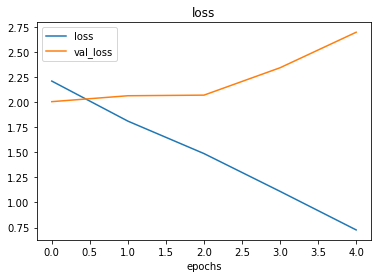

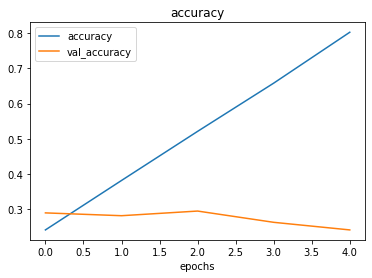

In [88]:
pd.DataFrame(history_02.history)[['loss','val_loss']].plot()
plt.title('loss')
plt.xlabel('epochs')

pd.DataFrame(history_02.history)[['accuracy','val_accuracy']].plot()
plt.title('accuracy')
plt.xlabel('epochs')

In [89]:
# simplifying the model further 

model_03 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_03.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

In [91]:
history_03 = model_03.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data = test_data,
                         validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 54s 229ms/step - loss: 3.4671 - accuracy: 0.2259 - val_loss: 2.2338 - val_accuracy: 0.2656
Epoch 2/5
235/235 [==============================] - 56s 240ms/step - loss: 1.5300 - accuracy: 0.4960 - val_loss: 2.2816 - val_accuracy: 0.2680
Epoch 3/5
235/235 [==============================] - 57s 244ms/step - loss: 0.8963 - accuracy: 0.7592 - val_loss: 2.2515 - val_accuracy: 0.2832
Epoch 4/5
235/235 [==============================] - 59s 250ms/step - loss: 0.4582 - accuracy: 0.9229 - val_loss: 2.4178 - val_accuracy: 0.2672
Epoch 5/5
235/235 [==============================] - 58s 246ms/step - loss: 0.2156 - accuracy: 0.9793 - val_loss: 2.5598 - val_accuracy: 0.2696


Text(0.5, 0, 'epochs')

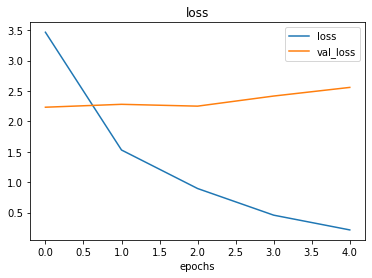

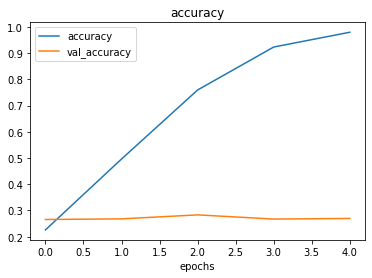

In [92]:
pd.DataFrame(history_03.history)[['loss','val_loss']].plot()
plt.title('loss')
plt.xlabel('epochs')

pd.DataFrame(history_03.history)[['accuracy','val_accuracy']].plot()
plt.title('accuracy')
plt.xlabel('epochs')

In [96]:
model_02.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

**Summary**  By removing convolutional layers ( and a MaxPool-layer in M3) the amount of trainable parameters **increased!** <br>
M_01: 283,920 <br>
M_02: 292,800 <br>
M_03: 1,232,390 <br>

Therefore the models overfit even more by *simplifying* it.

To prevent overfitting, the trainable parameters have to get reduced or the amount of data has to get increased -> **Data Augmentation**

## 6. Data Augmentation

In [98]:
#Rescale
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                rotation_range=0.2,
                                width_shift_range=0.15,
                                height_shift_range=0.15,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches

train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                               batch_size=32,
                               target_size=(224,224),
                               class_mode='categorical',
                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                               batch_size=32,
                               target_size=(224,224),
                               class_mode='categorical',
                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [101]:
# Recreating Model_01 with augmented data for fitting

model_04 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3), activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_04.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

In [102]:
history_04= model_04.fit(train_data_aug,
                epochs = 5,
                steps_per_epoch=len(train_data_aug),
                validation_data=test_data,
                validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 173s 735ms/step - loss: 2.2606 - accuracy: 0.1491 - val_loss: 2.0886 - val_accuracy: 0.2440
Epoch 2/5
235/235 [==============================] - 186s 790ms/step - loss: 2.0988 - accuracy: 0.2381 - val_loss: 1.9858 - val_accuracy: 0.3060
Epoch 3/5
235/235 [==============================] - 189s 804ms/step - loss: 2.0253 - accuracy: 0.2857 - val_loss: 1.8979 - val_accuracy: 0.3312
Epoch 4/5
235/235 [==============================] - 186s 792ms/step - loss: 1.9755 - accuracy: 0.3085 - val_loss: 1.8750 - val_accuracy: 0.3424
Epoch 5/5
235/235 [==============================] - 188s 800ms/step - loss: 1.9516 - accuracy: 0.3151 - val_loss: 1.8705 - val_accuracy: 0.3508


Text(0.5, 0, 'epochs')

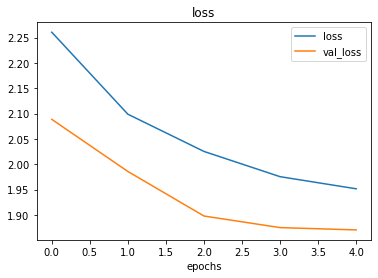

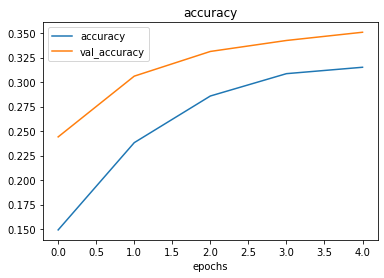

In [103]:
pd.DataFrame(history_04.history)[['loss','val_loss']].plot()
plt.title('loss')
plt.xlabel('epochs')

pd.DataFrame(history_04.history)[['accuracy','val_accuracy']].plot()
plt.title('accuracy')
plt.xlabel('epochs')

the curves a quite parallel which means the model generalizes the patterns pretty good. But the overall performance is still poor. Maybe train for another 10 epochs ???

In [105]:
model_04.evaluate(test_data)

79/79 [==============================] - 14s 178ms/step - loss: 1.8705 - accuracy: 0.3508


[1.8704546689987183, 0.3508000075817108]

In [106]:
model_01.evaluate(test_data)

79/79 [==============================] - 14s 182ms/step - loss: 3.1014 - accuracy: 0.2548


[3.1014368534088135, 0.2547999918460846]

Due to augmented data the same model performs much better!

## 7. Repeat until satisfied

* restructuring the model' architecture
* adjust learning rate
* try different augmented data
* more epochs
* Transfer Learning (next module)

## Making a prediction with our trained model

In [107]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [108]:
import matplotlib.image as mpimg

steak_path = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'
steak = mpimg.imread(steak_path, format="jpeg")


burger_path = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg'
hamburger = mpimg.imread(burger_path, format="jpeg")

sushi_path = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg'
sushi = mpimg.imread(sushi_path, format="jpeg")

pizza_path = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg'
pizza = mpimg.imread(pizza_path, format="jpeg")

C:\Users\neema\AppData\Local\Temp/ipykernel_9560/1264400220.py:4: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  steak = mpimg.imread(steak_path, format="jpeg")
C:\Users\neema\AppData\Local\Temp/ipykernel_9560/1264400220.py:8: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  hamburger = mpimg.imread(burger_path, format="jpeg")
C:\Users\neema\AppData\Local\Temp/ipykernel_9560/1264400220.py:11: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases l

In [120]:
def load_and_prep(filename, img_shape=224):
    """
    Reads an image from filename and turns into a tensor and reshapes it
    """
    # Read in the image
    img = mpimg.imread(filename, format="jpeg")
    #img = tf.io.read_file(file)
    
    
    # Decode the read file into a tensor
    img = tf.constant(img)
    
    #Resize the image
    img=tf.image.resize(img, size=[img_shape,img_shape])
    
    #Rescale the image
    img = img/255.
    
    return img
        

In [121]:
steak = load_and_prep(steak_path)
pizza = load_and_prep(pizza_path)
hamburger = load_and_prep(burger_path)
sushi = load_and_prep(sushi_path)

C:\Users\neema\AppData\Local\Temp/ipykernel_9560/957139235.py:6: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = mpimg.imread(filename, format="jpeg")


In [122]:
type(sushi)

tensorflow.python.framework.ops.EagerTensor

In [123]:
sushi.shape

TensorShape([224, 224, 3])

In [128]:
pred_sushi = model_04.predict(tf.expand_dims(sushi, axis=0))
pred_sushi

array([[0.413692  , 0.16339056, 0.00648126, 0.10141166, 0.0598902 ,
        0.00844929, 0.11987267, 0.01816223, 0.03621462, 0.07243546]],
      dtype=float32)

In [129]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [134]:
pred_steak = model_04.predict(tf.expand_dims(steak, axis=0))
pred_steak.shape

(1, 10)

In [145]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at the filename, makes a prediction with the model
    and plots the image with the predicted class as title
    """
    
    #Import
    img = load_and_prep(filename)
    
    #make prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    #get the predicted class
    pred_class = class_names[tf.argmax(tf.squeeze(pred))]
    
    #plot image and predicted class
    plt.imshow(img)
    plt.title(f"{pred_class.upper()}")
    plt.axis(False)
    

C:\Users\neema\AppData\Local\Temp/ipykernel_9560/957139235.py:6: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = mpimg.imread(filename, format="jpeg")


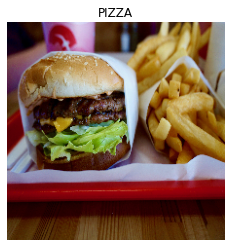

In [149]:
pred_and_plot(model_04, burger_path)

In [151]:
model_04.save('food_classifier_Acc35perc.h5')